In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
df=pd.read_csv('placement.csv')

In [7]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in lpa')

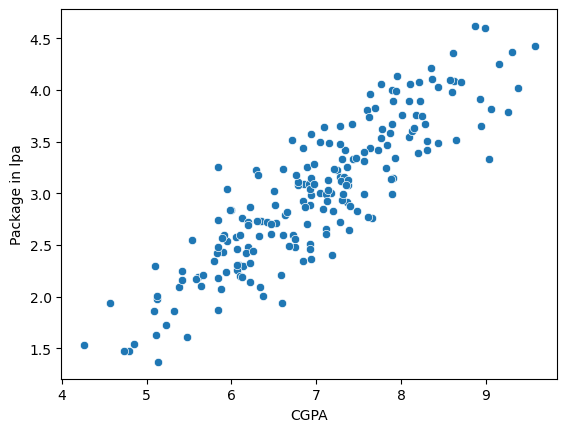

In [9]:
sns.scatterplot(data=df,x=df['cgpa'],y=df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package in lpa")

In [10]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [11]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [12]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [14]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [19]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [21]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

E:\AnacondaPython\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package in lpa')

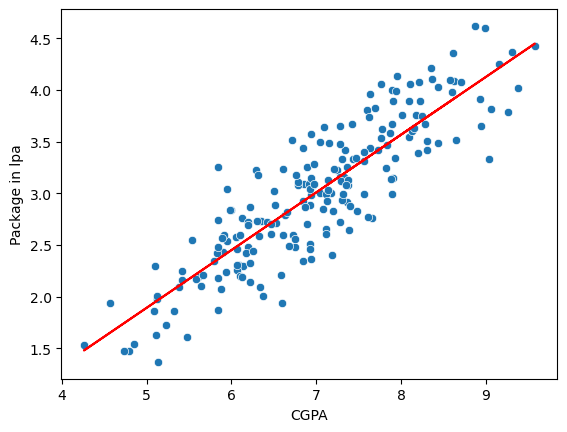

In [23]:
sns.scatterplot(data=df,x=df['cgpa'],y=df['package'])
plt.plot(x_train,lr.predict(x_train),c='r')
plt.xlabel("CGPA")
plt.ylabel("Package in lpa")

In [25]:
m=lr.coef_   #slope
m

array([0.55795197])

In [26]:
b=lr.intercept_
b

-0.8961119222429144

In [27]:
#y=mx+b
x_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [51]:
class MyLR:
    def __init__(self):
        self.m=None
        self.b=None
    def fit(self,x_train,y_train):
        num=0
        den=0
        for i in range(x_train.shape[0]):
            num=num+((x_train[i]-x_train.mean())*(y_train[i]-y_train.mean()))
            den=den+(x_train[i]-x_train.mean())**2
        self.m=num/den
        self.b=y_train.mean()- (self.m*x_train.mean())
        
    def predict(self,x_test):
        return self.m*x_test+self.b
        

In [52]:
import numpy as np
import pandas as pd

In [53]:
df=pd.read_csv('placement.csv')

In [54]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [55]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values
print(x)
print(y)

[6.89 5.12 7.82 7.42 6.94 7.89 6.73 6.75 6.09 8.31 5.32 6.61 8.94 6.93
 7.73 7.25 6.84 5.38 6.94 7.48 7.28 6.85 6.14 6.19 6.53 7.28 8.31 5.42
 5.94 7.15 7.36 8.1  6.96 6.35 7.34 6.87 5.99 5.9  8.62 7.43 9.38 6.89
 5.95 7.66 5.09 7.87 6.07 5.84 8.63 8.87 9.58 9.26 8.37 6.47 6.86 8.2
 5.84 6.6  6.92 7.56 5.61 5.48 6.34 9.16 7.36 7.6  5.11 6.51 7.56 7.3
 5.79 7.47 7.78 8.44 6.85 6.97 6.94 8.99 6.59 7.18 7.63 6.1  5.58 8.44
 4.26 4.79 7.61 8.09 4.73 6.42 7.11 6.22 7.9  6.79 5.83 6.63 7.11 5.98
 7.69 6.61 7.95 6.71 5.13 7.05 7.62 6.66 6.13 6.33 7.76 7.77 8.18 5.42
 8.58 6.94 5.84 8.35 9.04 7.12 7.4  7.39 5.23 6.5  5.12 5.1  6.06 7.33
 5.91 6.78 7.93 7.29 6.68 6.37 5.84 6.05 7.2  6.1  5.64 7.14 7.91 7.19
 7.91 6.76 6.93 4.85 6.17 5.84 6.07 5.66 7.57 8.28 6.3  6.12 7.37 7.94
 7.08 6.98 7.38 6.47 5.95 8.71 7.13 7.3  5.53 8.93 9.06 8.21 8.6  8.13
 8.65 9.31 6.22 8.01 6.93 6.75 7.32 7.04 6.29 7.09 8.15 7.14 6.19 8.22
 5.88 7.28 7.88 6.31 7.84 6.26 7.35 8.11 6.19 7.28 8.25 4.57 7.89 6.93
 5.89 7.

In [56]:
x_train.shape

(160,)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [58]:
x_train.shape

(160,)

In [59]:
lr=MyLR()

In [60]:
lr.fit(x_train,y_train)

In [63]:
print(lr.predict(x_test[0]))

3.891116009744203


In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [66]:
y_pred=lr.predict(x_test)

In [67]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [68]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [69]:
print("MAE",mean_absolute_error(y_test,y_pred))


MAE 0.2884710931878174


In [70]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495523


In [72]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.3482705171773161


In [74]:
r2=r2_score(y_test,y_pred)
print("R2 Score",r2)

R2 Score 0.7807301475103842


In [75]:
x_test.shape

(40,)

In [76]:
#Adjusted R2 score
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343417